In [433]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns


In [434]:
platf_dt = pd.read_csv('datasets/platformdata .csv',sep=';')
us_dt= pd.read_csv("datasets/rating_users.csv", sep=';')


In [435]:
# La condicion es solo peliculas, asi que lo guardo en otro dataframe.
movies= platf_dt[platf_dt['type']=='movie']


In [436]:
movies.reset_index(drop=True).head()

,id,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,duration_int,duration_type,score
0,as1,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",canada,2021-03-30,2014,g,"comedy, drama",a small fishing village must procure a local d...,113.0,min,3.467131
1,as2,movie,take care good night,girish joshi,"mahesh manjrekar, abhay mahajan, sachin khedekar",india,2021-03-30,2018,13+,"drama, international",a metro family decides to fight a cyber crimin...,110.0,min,3.548682
2,as3,movie,secrets of deception,josh webber,"tom sizemore, lorenzo lamas, robert lasardo, r...",united states,2021-03-30,2017,g,"action, drama, suspense",after a man discovers his wife is cheating on ...,74.0,min,3.498812
3,as4,movie,pink: staying true,sonia anderson,"interviews with: pink, adele, beyoncé, britney...",united states,2021-03-30,2014,g,documentary,"pink breaks the mold once again, bringing her ...",69.0,min,3.536093
4,as5,movie,monster maker,giles foster,"harry dean stanton, kieran o'brien, george cos...",united kingdom,2021-03-30,1989,g,"drama, fantasy",teenage matt banting wants to work with a famo...,45.0,min,3.478992


In [437]:
us_dt

,userId,rating,timestamp,movieId
0,1,1.0,2015-03-09,as680
1,1,4.5,2015-03-09,ns2186
2,1,5.0,2015-03-09,hs2381
3,1,5.0,2015-03-09,ns3663
4,1,5.0,2015-03-09,as9500
...,...,...,...,...
11013818,124380,4.5,2007-12-04,ns5272
11013819,124380,2.5,2007-12-04,ns5492
11013820,124380,3.5,2007-12-04,hs305
11013821,124380,4.5,2007-12-04,ns7881


In [438]:
df = us_dt.merge(platf_dt, left_on='movieId', right_on='id')
df= df[df['type']=='movie']
df.reset_index(drop=True)

,userId,rating_x,timestamp,movieId,id,type,title,director,cast,country,date_added,release_year,rating_y,listed_in,description,duration_int,duration_type,score
0,1,4.5,2015-03-09,ns2186,ns2186,movie,latte and the magic waterstone,"regina welker, nina wels","ashley bornancin, carter hastings",germany,2020-07-31,2020,tv-y,"children & family movies, comedies",when a greedy bear steals a magic stone to kee...,83.0,min,3.55600
1,231,4.0,2009-02-11,ns2186,ns2186,movie,latte and the magic waterstone,"regina welker, nina wels","ashley bornancin, carter hastings",germany,2020-07-31,2020,tv-y,"children & family movies, comedies",when a greedy bear steals a magic stone to kee...,83.0,min,3.55600
2,843,5.0,2013-04-07,ns2186,ns2186,movie,latte and the magic waterstone,"regina welker, nina wels","ashley bornancin, carter hastings",germany,2020-07-31,2020,tv-y,"children & family movies, comedies",when a greedy bear steals a magic stone to kee...,83.0,min,3.55600
3,978,4.5,2007-01-03,ns2186,ns2186,movie,latte and the magic waterstone,"regina welker, nina wels","ashley bornancin, carter hastings",germany,2020-07-31,2020,tv-y,"children & family movies, comedies",when a greedy bear steals a magic stone to kee...,83.0,min,3.55600
4,1355,4.0,2008-04-14,ns2186,ns2186,movie,latte and the magic waterstone,"regina welker, nina wels","ashley bornancin, carter hastings",germany,2020-07-31,2020,tv-y,"children & family movies, comedies",when a greedy bear steals a magic stone to kee...,83.0,min,3.55600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6954518,123591,4.0,2000-05-08,ns1837,ns1837,movie,disconnect,"david 'tosh' gitonga, michael jones","brenda wairimu, nick mutuma, catherine kamau, ...",kenya,2020-10-16,2018,tv-ma,"comedies, international movies, romantic movies",a group of singletons stumbles through the wil...,107.0,min,3.55102
6954519,123756,3.0,2001-12-09,ns1837,ns1837,movie,disconnect,"david 'tosh' gitonga, michael jones","brenda wairimu, nick mutuma, catherine kamau, ...",kenya,2020-10-16,2018,tv-ma,"comedies, international movies, romantic movies",a group of singletons stumbles through the wil...,107.0,min,3.55102
6954520,123830,5.0,2010-03-28,ns1837,ns1837,movie,disconnect,"david 'tosh' gitonga, michael jones","brenda wairimu, nick mutuma, catherine kamau, ...",kenya,2020-10-16,2018,tv-ma,"comedies, international movies, romantic movies",a group of singletons stumbles through the wil...,107.0,min,3.55102
6954521,123882,3.5,2016-01-06,ns1837,ns1837,movie,disconnect,"david 'tosh' gitonga, michael jones","brenda wairimu, nick mutuma, catherine kamau, ...",kenya,2020-10-16,2018,tv-ma,"comedies, international movies, romantic movies",a group of singletons stumbles through the wil...,107.0,min,3.55102


In [439]:
df= df.iloc[:,[0,1,3,6,13]]
df.rename(columns={'rating_x':'rating'}, inplace=True)
df.reset_index(drop=True)

,userId,rating,movieId,title,listed_in
0,1,4.5,ns2186,latte and the magic waterstone,"children & family movies, comedies"
1,231,4.0,ns2186,latte and the magic waterstone,"children & family movies, comedies"
2,843,5.0,ns2186,latte and the magic waterstone,"children & family movies, comedies"
3,978,4.5,ns2186,latte and the magic waterstone,"children & family movies, comedies"
4,1355,4.0,ns2186,latte and the magic waterstone,"children & family movies, comedies"
...,...,...,...,...,...
6954518,123591,4.0,ns1837,disconnect,"comedies, international movies, romantic movies"
6954519,123756,3.0,ns1837,disconnect,"comedies, international movies, romantic movies"
6954520,123830,5.0,ns1837,disconnect,"comedies, international movies, romantic movies"
6954521,123882,3.5,ns1837,disconnect,"comedies, international movies, romantic movies"


In [440]:
from sklearn import preprocessing

In [441]:
label_encoder = preprocessing.LabelEncoder()
  

df['movieId'] = label_encoder.fit_transform(df['movieId'])

In [442]:
df['movieId'].value_counts()

2171     575
6437     560
4565     555
6816     554
2798     554
        ... 
8970     406
11927    405
12582    402
9567     399
2842     396
Name: movieId, Length: 14526, dtype: int64

In [443]:
#agarro un porcentaje de los datos
df = df.sample(frac=0.001)

In [444]:
df.reset_index(drop=True)

,userId,rating,movieId,title,listed_in
0,250822,4.5,4364,age of summer,comedy
1,121177,4.5,5980,"supa strikas - eat, sleep, play soccer","animation, documentary, kids"
2,270048,5.0,7997,trolls world tour,"action, adventure, comedy"
3,55506,4.0,10935,once in a lifetime sessions with kasabian,"documentaries, music & musicals"
4,111525,3.5,13643,rounders,dramas
...,...,...,...,...,...
6950,17057,1.0,6900,5th street,"action, suspense"
6951,2728,4.0,2082,jeremiah watkins: family reunion,"arts, entertainment, and culture, comedy"
6952,40222,2.0,3440,the legend of halloween jack,"horror, suspense"
6953,116004,4.0,2739,snoop dogg presents the bad girls of comedy,"arts, entertainment, and culture, comedy"


In [445]:
df.drop_duplicates()

,userId,rating,movieId,title,listed_in
8485188,250822,4.5,4364,age of summer,comedy
6942863,121177,4.5,5980,"supa strikas - eat, sleep, play soccer","animation, documentary, kids"
5321054,270048,5.0,7997,trolls world tour,"action, adventure, comedy"
3865774,55506,4.0,10935,once in a lifetime sessions with kasabian,"documentaries, music & musicals"
7174604,111525,3.5,13643,rounders,dramas
...,...,...,...,...,...
9594260,17057,1.0,6900,5th street,"action, suspense"
8316739,2728,4.0,2082,jeremiah watkins: family reunion,"arts, entertainment, and culture, comedy"
8060825,40222,2.0,3440,the legend of halloween jack,"horror, suspense"
2554180,116004,4.0,2739,snoop dogg presents the bad girls of comedy,"arts, entertainment, and culture, comedy"


In [446]:
#cantidad de usuarios y películas.
n_users = df.userId.unique().shape[0]
n_peliculas = df.movieId.unique().shape[0]
print('users '+str(n_users))
print('películas '+str(n_peliculas))

users 6082
películas 5501


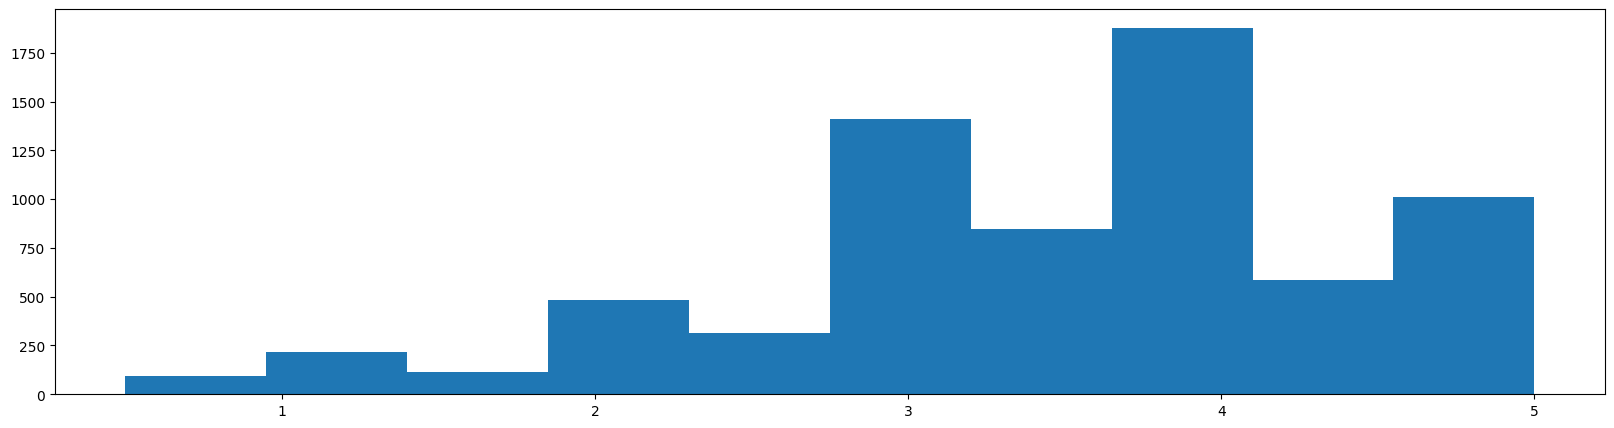

In [447]:
# Ratings o valoraciones
plt.hist(df.rating, bins=10)
plt.show()

In [448]:
print(us_dt.groupby(['rating'])['userId'].count())

rating
0.5     163993
1.0     350378
1.5     167371
2.0     739522
2.5     530228
3.0    2231080
3.5    1328630
4.0    2968261
4.5     919070
5.0    1615290
Name: userId, dtype: int64


(array([4253.,    0., 1071.,    0.,    0.,  153.,    0.,   19.,    0.,
           5.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

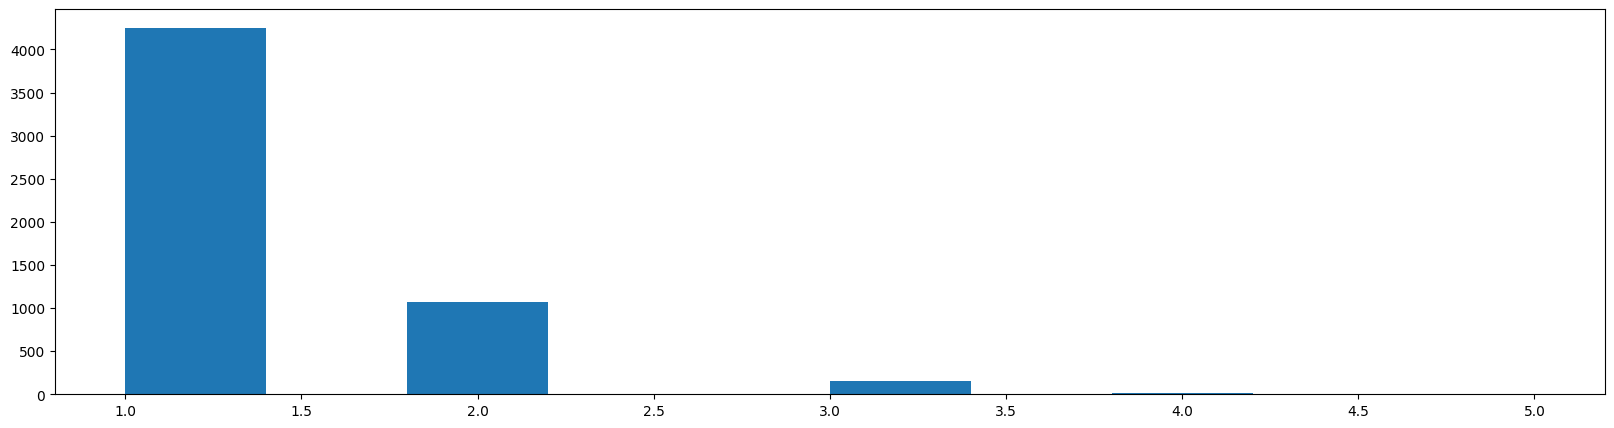

In [449]:
# Peliculas 
plt.hist(df.groupby(['movieId'])['movieId'].count(), bins=10)

In [450]:
df_matrix = pd.pivot_table(df, values='rating',index='userId', columns='movieId').fillna(0)

In [451]:
# Matrix creada usuarios/rating
print(df_matrix)

movieId  2      4      5      8      14     20     21     23     26     28     \
userId                                                                          
12         0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
32         0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
65         0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
120        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
123        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...        ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
270807     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
270817     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
270833     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
270879     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
270887     0.0    0.0    0.0

In [452]:
# Densidad
ratings = df_matrix.values
sparsity = float(len(ratings.nonzero()[0]))
sparsity /= (ratings.shape[0]*ratings.shape[1])
sparsity *= 100

In [453]:
print('Sparsity: {:4.2f}%'.format(sparsity))

Sparsity: 0.02%


In [454]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
import sklearn

In [455]:
#train y test
ratings_train, ratings_test = train_test_split(ratings, test_size=0.2, random_state=0)

(6082, 6082)


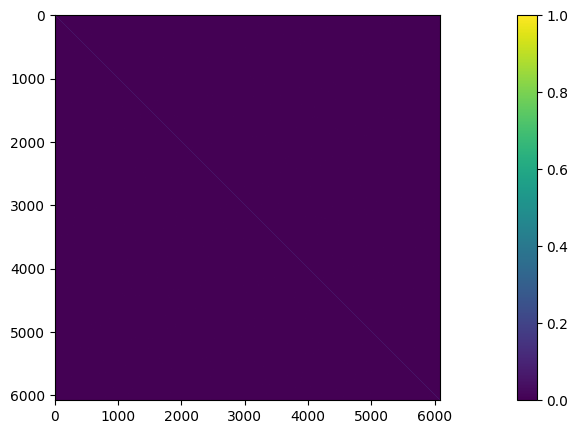

In [456]:
# Similitud que hay entre los usuarios
sin_matrix = 1 - sklearn.metrics.pairwise.cosine_distances(ratings)
print(sin_matrix.shape)
plt.imshow(sin_matrix)
plt.colorbar()
plt.show()

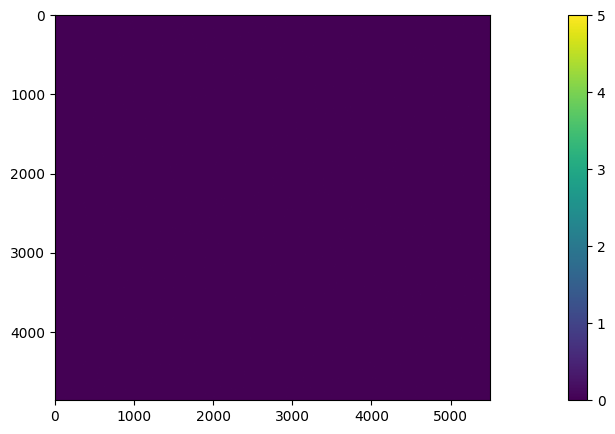

In [460]:
#Separar filas y columnas de train y test
sin_matrix_train = sin_matrix[0:4865,0:4865]
sin_matrix_test = sin_matrix_train[4865:6000,4865:6000]

user_predictions = sin_matrix_train.dot(ratings_train)/np.array([np.abs(sin_matrix_train).sum(axis=1)]).T

plt.rcParams['figure.figsize'] = (20.0,5.0)
plt.imshow(user_predictions)
plt.colorbar()
plt.show()

In [461]:
df.tail()

,userId,rating,movieId,title,listed_in
9594260,17057,1.0,6900,5th street,"action, suspense"
8316739,2728,4.0,2082,jeremiah watkins: family reunion,"arts, entertainment, and culture, comedy"
8060825,40222,2.0,3440,the legend of halloween jack,"horror, suspense"
2554180,116004,4.0,2739,snoop dogg presents the bad girls of comedy,"arts, entertainment, and culture, comedy"
7305277,64420,4.0,14487,the darkest hour,"action & adventure, sci-fi & fantasy"


In [462]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6955 entries, 8485188 to 7305277
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   userId     6955 non-null   int64  
 1   rating     6955 non-null   float64
 2   movieId    6955 non-null   int32  
 3   title      6955 non-null   object 
 4   listed_in  6955 non-null   object 
dtypes: float64(1), int32(1), int64(1), object(2)
memory usage: 298.8+ KB


In [469]:
df.reset_index(drop=True)

,userId,rating,movieId,title,listed_in
0,250822,4.5,4364,age of summer,comedy
1,121177,4.5,5980,"supa strikas - eat, sleep, play soccer","animation, documentary, kids"
2,270048,5.0,7997,trolls world tour,"action, adventure, comedy"
3,55506,4.0,10935,once in a lifetime sessions with kasabian,"documentaries, music & musicals"
4,111525,3.5,13643,rounders,dramas
...,...,...,...,...,...
6950,17057,1.0,6900,5th street,"action, suspense"
6951,2728,4.0,2082,jeremiah watkins: family reunion,"arts, entertainment, and culture, comedy"
6952,40222,2.0,3440,the legend of halloween jack,"horror, suspense"
6953,116004,4.0,2739,snoop dogg presents the bad girls of comedy,"arts, entertainment, and culture, comedy"


In [466]:
df[df['userId']==116004]

,userId,rating,movieId,title,listed_in
2554180,116004,4.0,2739,snoop dogg presents the bad girls of comedy,"arts, entertainment, and culture, comedy"


In [475]:
#Prueba
ejm = 64420

data = df[df['userId']==250822]
usuario_mira = data.iloc[0]['userId'] - 1

user = user_predictions.argsort()[usuario_mira]


IndexError: index 250821 is out of bounds for axis 0 with size 4865

In [ ]:
user

array([    0,  8275,  8276, ..., 12422, 10428,  3724], dtype=int64)

In [472]:
for i , x in enumerate(user[-3:]):
  selRepo = platf_dt[platf_dt['id']==(x+1)]
  print(selRepo['title'],'puntaje', user_predictions[usuario_mira][x])

Series([], Name: title, dtype: object) puntaje 0.0
Series([], Name: title, dtype: object) puntaje 0.0
Series([], Name: title, dtype: object) puntaje 2.5


In [ ]:
x

3724